<a href="https://colab.research.google.com/github/airenare/pneumonia_xray/blob/main/02_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chest X-Ray CNN to Detect Pneumonia

## Data Processing and Modeling

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix

import os

from google.colab import drive


### Importing the Datasets from Kaggle

In [ ]:
# !pip install kaggle

In [ ]:
drive.mount('/content/drive')

KeyboardInterrupt: 

In [ ]:
# Kaggle json path
kaggle_path = '/content/drive/MyDrive/kaggle.json'

In [ ]:
!mkdir ~/.kaggle
!cp {kaggle_path} ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls

drive  sample_data


In [ ]:
kaggle_1 = 'paultimothymooney/chest-xray-pneumonia'
kaggle_2 = 'salonimate/covid-pneumonia-nomal-xray'

In [ ]:
# make sure kaggle uses kaggle.json file
!kaggle config set -n path -v /content/images

# Download both datasets in the working directory
!kaggle datasets download -d {kaggle_1}
!kaggle datasets download -d {kaggle_2}

- path is now set to: /content/images
Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [00:10<00:00, 245MB/s]
100% 2.29G/2.29G [00:10<00:00, 233MB/s]
Dataset URL: https://www.kaggle.com/datasets/salonimate/covid-pneumonia-nomal-xray
License(s): unknown
 99% 1.90G/1.91G [00:15<00:00, 145MB/s]
100% 1.91G/1.91G [00:15<00:00, 131MB/s]


In [ ]:
# Unzip
!unzip -q /content/images/datasets/paultimothymooney/chest-xray-pneumonia/chest-xray-pneumonia.zip
!unzip -q /content/images/datasets/salonimate/covid-pneumonia-nomal-xray/covid-pneumonia-nomal-xray.zip

In [ ]:
# Remove the __MACOSX and chest_ray folders from /content/chest_xray
!rm -r /content/chest_xray/__MACOSX
!rm -r /content/chest_xray/chest_xray

In [ ]:
# Remove the /content/images folder
!rm -r /content/images

In [ ]:
# Move /content/New-CNP-Dataset and /content/chest_xray folders to images folder
!mkdir /content/images
!mv /content/New-CNP-Dataset /content/images
!mv /content/chest_xray /content/images

mkdir: cannot create directory ‘/content/images’: File exists


### Combine the datasets

In [ ]:
# Define the image size and batch size
img_height = 128
img_width = 128
batch_size = 32

In [ ]:
ds_1_path = '/content/images/chest_xray'
ds_2_path = '/content/images/New-CNP-Dataset'

In [ ]:
train_dir_1 = f"{ds_1_path}/train"
val_dir_1 = f"{ds_1_path}/val"
test_dir_1 = f"{ds_1_path}/test"

train_dir_2 = f"{ds_2_path}/train"
val_dir_2 = f"{ds_2_path}/validation"
test_dir_2 = f"{ds_2_path}/testing"

In [ ]:
# First DS
print("First directory")
train_ds_1 = image_dataset_from_directory(
    train_dir_1,
    color_mode='grayscale',
    image_size = (img_height, img_width),
    batch_size = batch_size)

val_ds_1 = image_dataset_from_directory(
    val_dir_1,
    color_mode='grayscale',
    image_size = (img_height, img_width),
    batch_size = batch_size)

test_ds_1 = image_dataset_from_directory(
    test_dir_1,
    color_mode='grayscale',
    image_size = (img_height, img_width),
    batch_size = batch_size)

# Second DS
print("Second directory")
train_ds_2 = image_dataset_from_directory(
    train_dir_2,
    color_mode='grayscale',
    image_size = (img_height, img_width),
    batch_size = batch_size)

val_ds_2 = image_dataset_from_directory(
    val_dir_2,
    color_mode='grayscale',
    image_size = (img_height, img_width),
    batch_size = batch_size)

test_ds_2 = image_dataset_from_directory(
    test_dir_2,
    color_mode='grayscale',
    image_size = (img_height, img_width),
    batch_size = batch_size)

First directory
Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Second directory
Found 4488 files belonging to 3 classes.
Found 1033 files belonging to 3 classes.
Found 1381 files belonging to 3 classes.


In [ ]:
# Get the class names
class_names_1 = {i: train_ds_1.class_names[i] for i in range(len(train_ds_1.class_names))}
# Get the class names
class_names_2 = {i: train_ds_2.class_names[i] for i in range(len(train_ds_2.class_names))}

class_names_1, class_names_2

({0: 'NORMAL', 1: 'PNEUMONIA'}, {0: 'covid', 1: 'normal', 2: 'pneumonia'})

In [ ]:
# Function to preview images from dataset
def preview_images(dataset):
  plt.figure(figsize=(10, 10))
  for images, labels in dataset.take(1):
      for i in range(9):
          plt.subplot(3,3, i + 1)
          plt.imshow(np.squeeze(images[i].numpy().astype('uint8')), cmap='gray')
          plt.title(dataset.class_names[labels[i]])
          plt.axis("off")

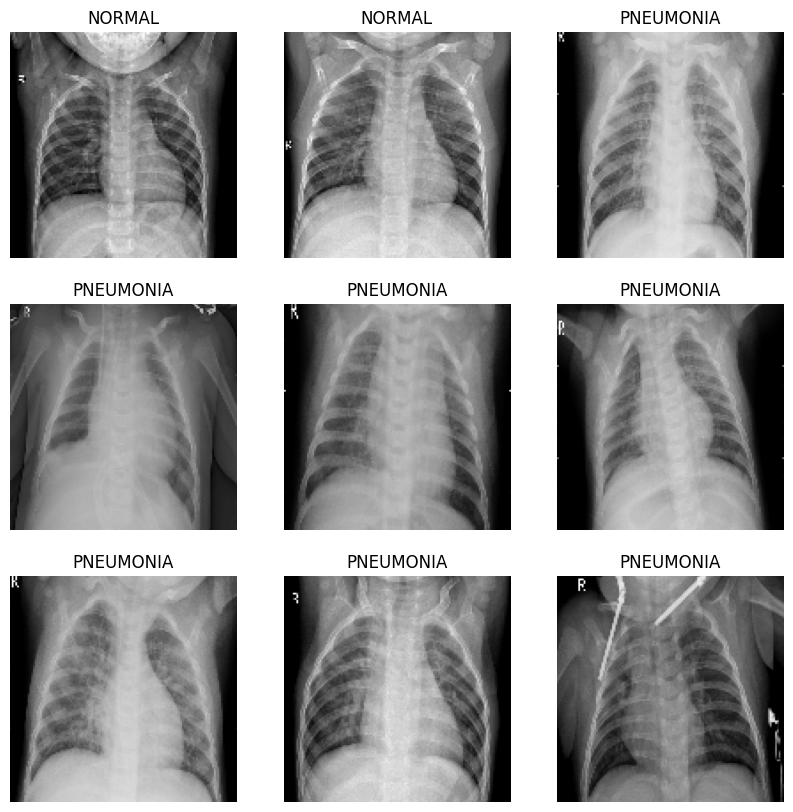

In [ ]:
preview_images(train_ds_1)

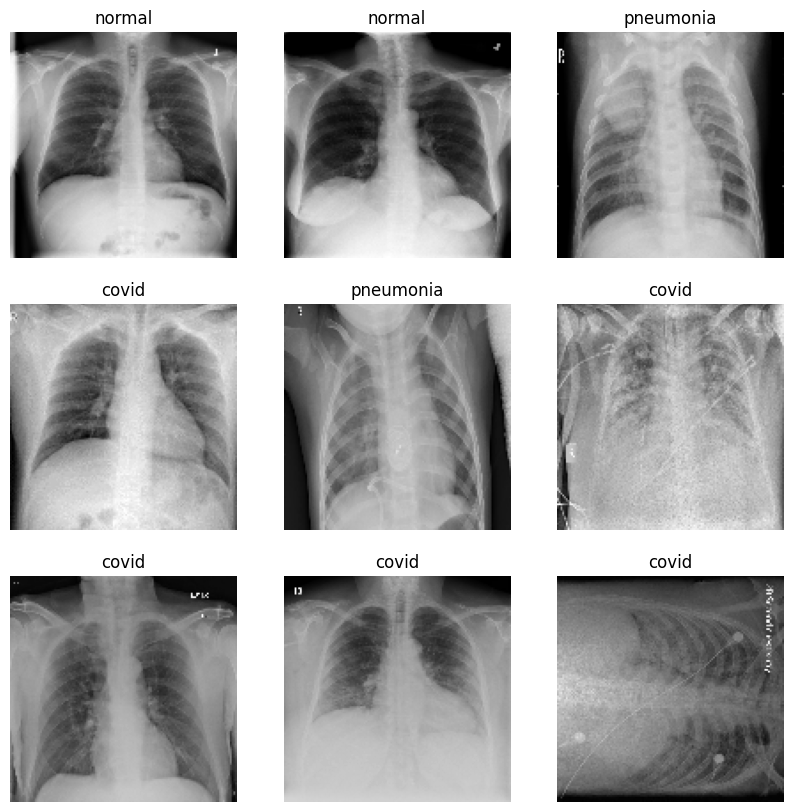

In [ ]:
preview_images(train_ds_2)

In [ ]:
# Function to show the number of images for each category within a dataset
def show_num_images(dataset, directory):
  classes = dataset.class_names
  num_images_per_class = []
  for cls in classes:
    num_images_per_class.append(len(os.listdir(f"{directory}/{cls}")))
  df = pd.DataFrame({'Class': classes, 'Number of Images': num_images_per_class})
  print(df)
  sns.barplot(x='Class', y='Number of Images', data=df)
  plt.show()
  return df

       Class  Number of Images
0     NORMAL              1341
1  PNEUMONIA              3875


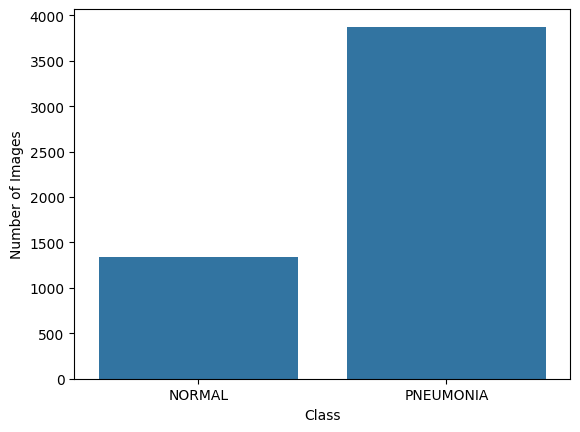

,Class,Number of Images
0,NORMAL,1341
1,PNEUMONIA,3875


In [ ]:
show_num_images(train_ds_1, train_dir_1)

       Class  Number of Images
0      covid              1505
1     normal              1505
2  pneumonia              1505


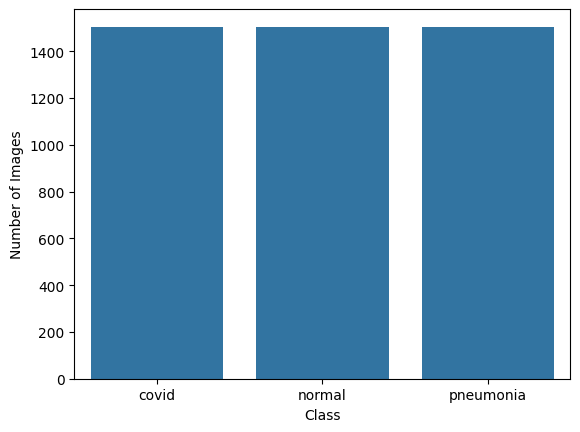

,Class,Number of Images
0,covid,1505
1,normal,1505
2,pneumonia,1505


In [ ]:
show_num_images(train_ds_2, train_dir_2)

In [ ]:
# Create a new directory 'combined' in /content/images folder and copy the contents of /content/images/chest_xray
!mkdir /content/images/combined
!cp -r /content/images/chest_xray/test /content/images/combined
!cp -r /content/images/chest_xray/train /content/images/combined
!cp -r /content/images/chest_xray/val /content/images/combined

mkdir: cannot create directory ‘/content/images/combined’: File exists


In [ ]:
# Copy the contents of /content/images/New-CNP-Dataset/train/normal folder into the /content/images/combined/train/NORMAL
!cp -r /content/images/New-CNP-Dataset/train/normal/* /content/images/combined/train/NORMAL

In [ ]:
ds_path = '/content/images/combined'

In [ ]:
train_dir = f"{ds_path}/train"
val_dir = f"{ds_path}/val"
test_dir = f"{ds_path}/test"

In [ ]:
# Create the new datasets
train_ds = image_dataset_from_directory(
    train_dir,
    color_mode='grayscale',
    image_size = (img_height, img_width),
    batch_size = batch_size)

val_ds = image_dataset_from_directory(
    val_dir,
    color_mode='grayscale',
    image_size = (img_height, img_width),
    batch_size = batch_size)

test_ds = image_dataset_from_directory(
    test_dir,
    color_mode='grayscale',
    image_size = (img_height, img_width),
    batch_size = batch_size)

Found 6503 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


       Class  Number of Images
0     NORMAL              2628
1  PNEUMONIA              3875


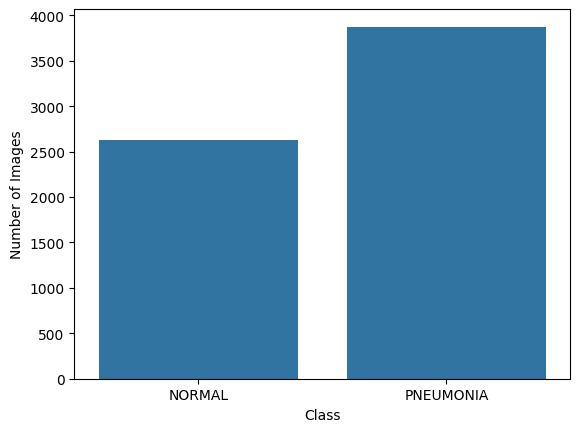

,Class,Number of Images
0,NORMAL,2628
1,PNEUMONIA,3875


In [ ]:
class_df = show_num_images(train_ds, train_dir)
class_df.head()

This looks much better than before. Let's get the class weights now.

In [ ]:
# Add the class_weight column to the class_df
class_df['class_weight'] = class_df['Number of Images'] / class_df['Number of Images'].sum()
class_df

,Class,Number of Images,class_weight
0,NORMAL,2628,0.404121
1,PNEUMONIA,3875,0.595879


### Modeling

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [ ]:
model = tf.keras.Sequential([
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomFlip("horizontal"),
    layers.RandomContrast(0.2),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])

In [ ]:
class_weights = {0: class_df['class_weight'][0], 1: class_df['class_weight'][1]}
class_weights

{0: 0.4041211748423804, 1: 0.5958788251576196}

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(
    optimizer=optimizer,
    loss=tf.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
epochs = 20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    class_weight=class_weights
)

Epoch 1/20
204/204 [==============================] - 23s 101ms/step - loss: 0.4201 - accuracy: 0.7409 - val_loss: 0.7302 - val_accuracy: 0.6250
Epoch 2/20
204/204 [==============================] - 20s 100ms/step - loss: 0.1867 - accuracy: 0.8242 - val_loss: 0.6688 - val_accuracy: 0.6250
Epoch 3/20
204/204 [==============================] - 21s 101ms/step - loss: 0.1665 - accuracy: 0.8498 - val_loss: 0.7918 - val_accuracy: 0.6250
Epoch 4/20
204/204 [==============================] - 20s 100ms/step - loss: 0.1623 - accuracy: 0.8567 - val_loss: 0.8086 - val_accuracy: 0.6875
Epoch 5/20
204/204 [==============================] - 21s 102ms/step - loss: 0.1548 - accuracy: 0.8645 - val_loss: 0.6417 - val_accuracy: 0.7500
Epoch 6/20
204/204 [==============================] - 21s 103ms/step - loss: 0.1431 - accuracy: 0.8707 - val_loss: 0.6270 - val_accuracy: 0.7500
Epoch 7/20
204/204 [==============================] - 20s 100ms/step - loss: 0.1505 - accuracy: 0.8685 - val_loss: 1.0288 - val_ac

In [ ]:
# Function to plot training history
def plot_history(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()

In [ ]:
# Function to show the confusion matrix
def show_cm(model):
    # Define class names
    class_names = ['NORMAL', 'PNEUMONIA']

    # List to store true and predicted labels
    true_labels = []
    predicted_labels = []

    # Iterate through the test dataset and make predictions
    for images, labels in test_ds:
        # Make predictions
        predictions = model.predict(images)
        # Get predicted labels
        predicted_labels.extend(np.argmax(predictions, axis=1))
        # Get true labels
        true_labels.extend(labels.numpy())

    # Compute confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels)

    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix,
                annot=True,
                fmt='d',
                cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names,
                cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

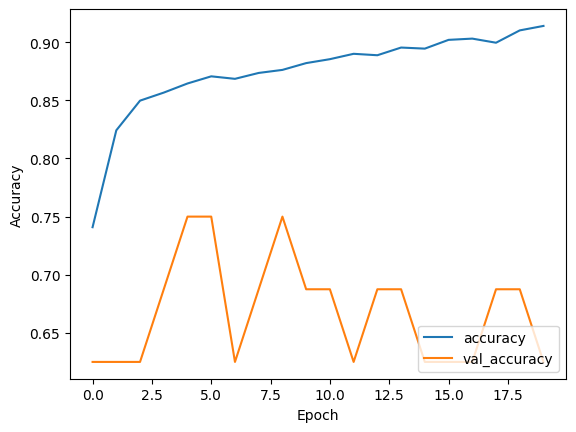

In [ ]:
plot_history(history)

1/1 [==============================] - 0s 33ms/step


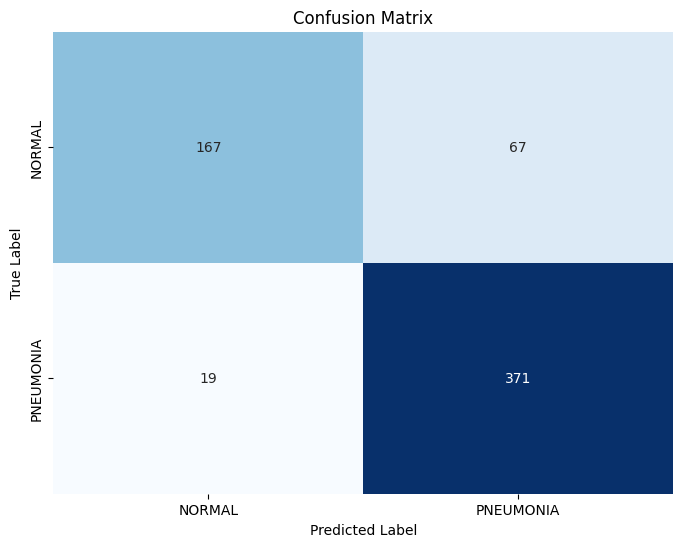

In [ ]:
show_cm(model)

In [ ]:
# Accuracy of model
model.evaluate(test_ds)

20/20 [==============================] - 1s 25ms/step - loss: 0.3541 - accuracy: 0.8622


[0.3541354238986969, 0.8621794581413269]

In [ ]:
# Save model as keras, json and weights
model.save('model.keras')
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model_weights.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# zip model.keras model.json model_weights.h5
!zip -r model.zip model.keras model.json model_weights.h5

  adding: model.keras (deflated 18%)
  adding: model.json (deflated 88%)
  adding: model_weights.h5 (deflated 8%)
